# Part B

## Problem 1

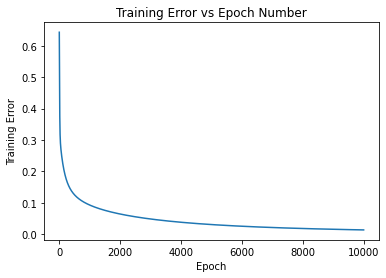

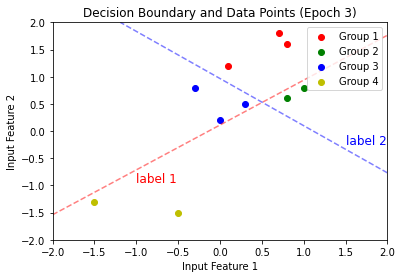

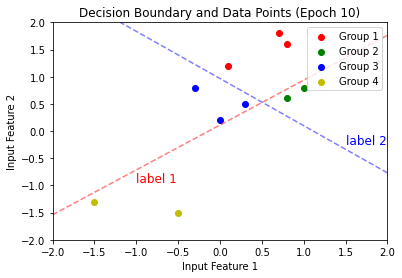

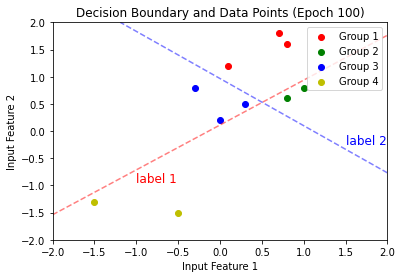

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize the network's parameters
np.random.seed(0)  # For reproducibility
input_size = 2
output_size = 2
learning_rate = 0.05
epochs = 10000

# Define the input matrix and target matrix
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])

Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# Initialize weights and biases
weights = np.random.rand(output_size, input_size)
biases = np.random.rand(output_size, 1)

# Initialize error history
error_history = []

# Model Training
for epoch in range(epochs):
    total_error = 0

    for i in range(X.shape[1]):
        # Forward pass
        Z = np.dot(weights, X[:, i].reshape(-1, 1)) + biases
        Y_pred = sigmoid(Z)

        # Calculate the error
        error = Y_pred - Y[:, i].reshape(-1, 1)
        total_error += np.sum(error**2)

        # Backpropagation
        dY = sigmoid_derivative(Y_pred)* error
        dW = np.dot(dY, X[:, i].reshape(1, -1))
        dB = dY

        # Update weights and biases
        weights -= learning_rate * dW
        biases -= learning_rate * dB

    # Append the total error to the history
    error_history.append(total_error/X.shape[1])

# Plot training error vs epoch number
plt.figure(1)
plt.plot(range(epochs), error_history)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs Epoch Number')

# Plot decision boundary and data points for different epochs
for epoch in [3, 10, 100]:
    plt.figure(epoch)
    plt.scatter(X[0, :3], X[1, :3], c='r', marker='o', label='Group 1')
    plt.scatter(X[0, 3:5], X[1, 3:5], c='g', marker='o', label='Group 2')
    plt.scatter(X[0, 5:8], X[1, 5:8], c='b', marker='o', label='Group 3')
    plt.scatter(X[0, 8:], X[1, 8:], c='y', marker='o', label='Group 4')
    
    # Create a mesh grid to plot the decision boundary
    x_range = np.linspace(-2, 2, 100)
    y_range = np.linspace(-2, 2, 100)
    X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
    Z_mesh = sigmoid(np.dot(weights, np.vstack([X_mesh.ravel(), Y_mesh.ravel()])) + biases)
    Z_mesh0 = Z_mesh[0].reshape(X_mesh.shape)
    Z_mesh1 = Z_mesh[1].reshape(X_mesh.shape)
    # Draw contour lines for decision boundaries
    plt.contour(X_mesh, Y_mesh, Z_mesh0, levels=[0.5], colors='red', linestyles='dashed', alpha=0.5)
    plt.contour(X_mesh, Y_mesh, Z_mesh1, levels=[0.5], colors='blue', linestyles='dashed', alpha=0.5)
    # Annotate the decision boundary lines with labels
    plt.text(-1.0, -1.0, 'label 1', color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
    plt.text(1.5, -0.3, 'label 2', color='blue', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.title(f'Decision Boundary and Data Points (Epoch {epoch})')
    plt.legend()

plt.show()

## Problem 2

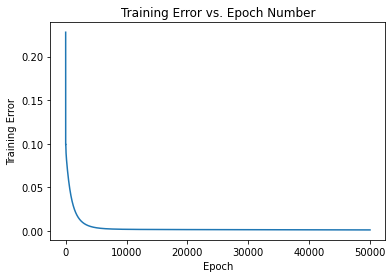

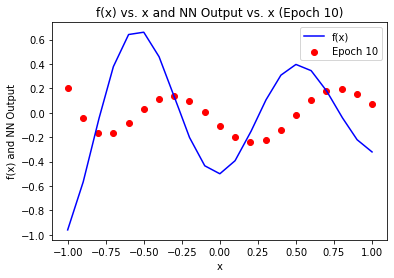

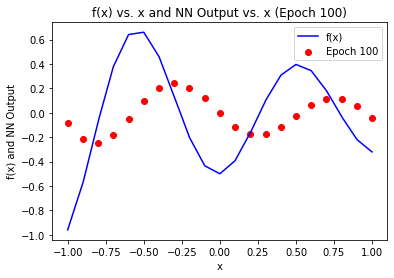

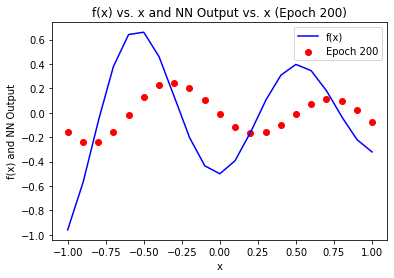

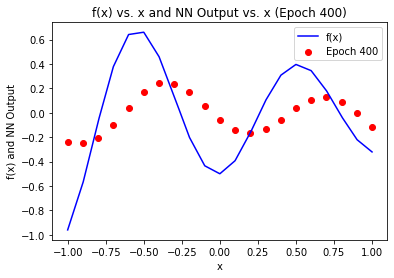

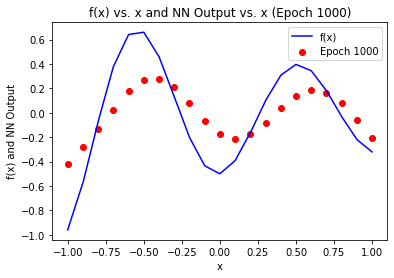

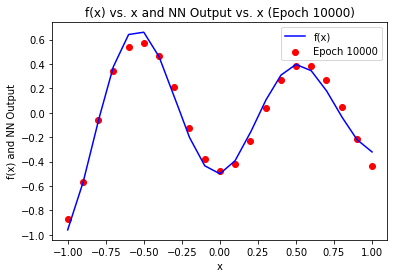

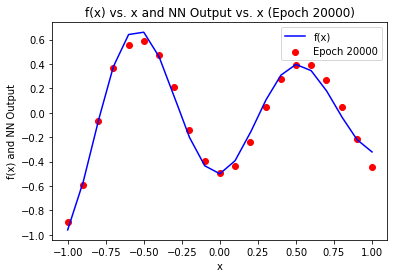

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the tanh activation function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2


# Define the architecture of the neural network
np.random.seed(0)  # For reproducibility
input_size = 1
hidden_1 = 32
hidden_2 = 8
output_size = 1

# Initialize weights and biases
# W1 = np.random.rand(input_size, hidden_1)-1
# B1 = np.random.rand(1,hidden_1)
# W2 = np.random.rand(hidden_1, hidden_2)-1
# B2 = np.random.rand(1,hidden_2)
# W3 = np.random.rand(hidden_2, output_size)-1
# B3 = np.random.rand(1,output_size)

W1 = np.random.uniform(-1, 1, (input_size, hidden_1))
B1 = np.random.rand(1,hidden_1)-0.5
W2 = np.random.uniform(-1, 1, (hidden_1, hidden_2))
B2 = np.random.rand(1,hidden_2)-0.5
W3 = np.random.uniform(-1, 1, (hidden_2, output_size))
B3 = np.random.rand(1,output_size)-0.5


# Define hyperparameters
lr = 0.05
epochs = 50001
epoch_list = [10, 100, 200, 400, 1000, 10000, 20000]

# Define the input and target data
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

# Lists to store training errors and network outputs for different epochs
training_errors = []
network_outputs = {}
for epoch in range(epochs):
    network_output = []
    total_error = 0
    for i in range(len(X)):
        # Forward pass

        input_layer = X[i]
        hidden1 = tanh(np.dot(input_layer, W1) + B1)
        hidden2 = tanh(np.dot(hidden1, W2) + B2)
        y_pred = tanh(np.dot(hidden2, W3) + B3)
#         print(output_out)

        # Compute error
        error = 0.5*np.mean(np.power(Y[i]-y_pred, 2))
        total_error += error
        network_output.append(y_pred)

        # Backpropagation
        delta_output = (y_pred-Y[i]) * tanh_derivative(y_pred)
        delta_hidden2 = np.dot(delta_output, W3.T) * tanh_derivative(hidden_2)
        delta_hidden1 = np.dot(delta_hidden2, W2.T) * tanh_derivative(hidden_1)
        delta_input = np.dot(delta_hidden1, W1.T) * tanh_derivative(input_layer)

        W3 -= lr * np.dot(hidden2.T, delta_output)
        B3 -= lr * delta_output
        
        W2 -= lr * np.dot(hidden1.T, delta_hidden2)
        B2 -= lr * delta_hidden2

        W1 -= lr * np.dot(input_layer.T, delta_hidden1)
        B1 -= lr * delta_hidden1
    
    training_errors.append(total_error/len(X))
    if epoch in epoch_list:
        network_outputs[epoch] = network_output

# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(epochs), training_errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')

# Plot the actual function f(x) and network output vs. x for different epochs
x_values = np.linspace(-1, 1, 1000)
actual_function = [np.interp(x, X, Y) for x in x_values]
for epoch in [10, 100, 200, 400, 1000, 10000, 20000]:
    plt.figure(epoch)
    plt.plot(x_values, actual_function, c='b', label='f(x)')
    plt.scatter(X, network_outputs[epoch], c='r', marker='o', label=f'Epoch {epoch}')
    
    plt.xlabel('x')
    plt.ylabel('f(x) and NN Output')
    plt.title(f'f(x) vs. x and NN Output vs. x (Epoch {epoch})')
    plt.legend()

plt.show()

## Problem 2 another way

In [50]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
    
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2


def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        errors = []
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
#             print('epoch %d/%d   error=%f' % (i+1, epochs, err))
            errors.append(err)
        return errors


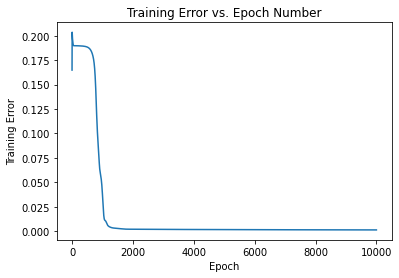

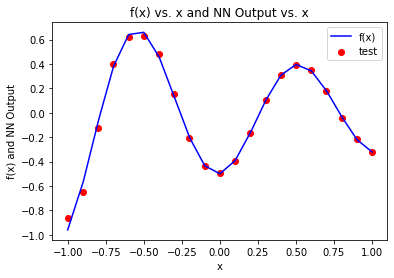

In [51]:
import numpy as np
import matplotlib.pyplot as plt
# from Network import Network
# from fc_layer import FCLayer
# from activation_layer import ActivationLayer
# from activations import tanh, tanh_prime
# from losses import mse, mse_prime

# training data
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

# network
np.random.seed(0)  # For reproducibility
net = Network()
net.add(FCLayer(1, 32))
net.add(ActivationLayer(tanh, tanh_derivative))
net.add(FCLayer(32, 8))
net.add(ActivationLayer(tanh, tanh_derivative))
net.add(FCLayer(8, 1))
net.add(ActivationLayer(tanh, tanh_derivative))

# train
net.use(mse,mse_prime)
errors =net.fit(X,Y, epochs=10000, learning_rate=0.05)

# test
out = net.predict(X)
# print(out)


# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(10000), errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')

# Plot the actual function f(x) and network output vs. x for different epochs
x_values = np.linspace(-1, 1, 10000)
actual_function = [np.interp(x, X, Y) for x in x_values]

plt.figure()
plt.plot(x_values, actual_function, c='b', label='f(x)')
plt.scatter(X, out, c='r', marker='o', label=f'test')

plt.xlabel('x')
plt.ylabel('f(x) and NN Output')
plt.title(f'f(x) vs. x and NN Output vs. x')
plt.legend()

plt.show()

## Problem 3

/tmp/ipykernel_130407/1447723821.py:7: RuntimeWarning: overflow encountered in exp
  return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))
/tmp/ipykernel_130407/1447723821.py:7: RuntimeWarning: invalid value encountered in divide
  return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))


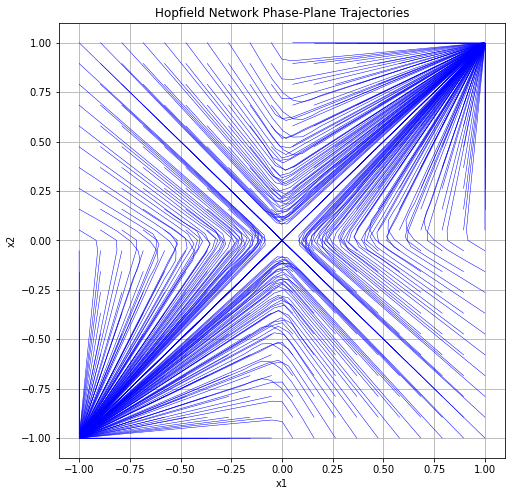

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))

# Define the differential equation for the Hopfield network
def hopfield_network(t, x):
    W = np.array([[0, 1], [1, 0]])
    b = np.array([0, 0])
    dxdt = -0.5 * x + 0.5 * np.dot(W, sigmoid(x)) + 0.5 * b
    return dxdt

# Create a grid of initial conditions
x1_range = np.linspace(-1, 1, 20)
x2_range = np.linspace(-1, 1, 20)
initial_conditions = [(x1, x2) for x1 in x1_range for x2 in x2_range]

# Time span for integration
t_span = (0, 10)

# Plot phase-plane trajectories for each initial condition
plt.figure(figsize=(8, 8))
for initial_condition in initial_conditions:
    sol = solve_ivp(hopfield_network, t_span, initial_condition, t_eval=np.linspace(*t_span, 100))
    plt.plot(sol.y[0], sol.y[1], 'b-', lw=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hopfield Network Phase-Plane Trajectories')
plt.grid()
plt.show()

## Problem 4

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
         # Define linear layers for query, key, value, and output transformations
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
    
    # Split the input into multiple heads     
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
    
    # Combine the multi-head outputs    
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
    
    # Forward pass through the multi-head attention layer
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        # Define linear layers for position-wise feed-forward network
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()
        
    # Forward pass through the position-wise feed-forward network
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()
        
        # Create positional encoding using sine and cosine functions
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    # Add positional encoding to the input   
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
                       
        # normalization
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    # Forward pass through the encoder layer    
    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        # attentions
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        
        # normalization
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    # Forward pass through the decoder layer    
    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x
    
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    # Generate masks for source and target sequences
    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    # Forward pass through the transformer model
    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        
        # embedding vectors
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output



In [7]:
# parameters
src_vocab_size = 5000
tgt_vocab_size = 5000
d_model = 512
num_heads = 8
num_layers = 6
d_ff = 2048
max_seq_length = 100
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)

# Generate random sample data
src_data = torch.randint(1, src_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)
tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)

In [8]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

transformer.train()
errors = []
for epoch in range(2000):
    optimizer.zero_grad()
    output = transformer(src_data, tgt_data[:, :-1])
    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt_data[:, 1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
    errors.append(loss.item())

Epoch: 1, Loss: 8.68298053741455
Epoch: 2, Loss: 8.552188873291016
Epoch: 3, Loss: 8.485610961914062
Epoch: 4, Loss: 8.431486129760742
Epoch: 5, Loss: 8.371345520019531
Epoch: 6, Loss: 8.305441856384277
Epoch: 7, Loss: 8.219883918762207
Epoch: 8, Loss: 8.13733959197998
Epoch: 9, Loss: 8.05381965637207
Epoch: 10, Loss: 7.977182865142822
Epoch: 11, Loss: 7.894254207611084
Epoch: 12, Loss: 7.81112003326416
Epoch: 13, Loss: 7.733532428741455
Epoch: 14, Loss: 7.643638610839844
Epoch: 15, Loss: 7.562524795532227
Epoch: 16, Loss: 7.479722023010254
Epoch: 17, Loss: 7.3956298828125
Epoch: 18, Loss: 7.311842918395996
Epoch: 19, Loss: 7.23036003112793
Epoch: 20, Loss: 7.155593395233154
Epoch: 21, Loss: 7.0697102546691895
Epoch: 22, Loss: 6.989499568939209
Epoch: 23, Loss: 6.914424896240234
Epoch: 24, Loss: 6.83735990524292
Epoch: 25, Loss: 6.766722202301025
Epoch: 26, Loss: 6.690896987915039
Epoch: 27, Loss: 6.622735500335693
Epoch: 28, Loss: 6.540996551513672
Epoch: 29, Loss: 6.475466728210449
E

Epoch: 228, Loss: 0.17284348607063293
Epoch: 229, Loss: 0.17049217224121094
Epoch: 230, Loss: 0.16616082191467285
Epoch: 231, Loss: 0.16336439549922943
Epoch: 232, Loss: 0.15946248173713684
Epoch: 233, Loss: 0.1586948037147522
Epoch: 234, Loss: 0.15378887951374054
Epoch: 235, Loss: 0.15119563043117523
Epoch: 236, Loss: 0.14867280423641205
Epoch: 237, Loss: 0.14624132215976715
Epoch: 238, Loss: 0.14311225712299347
Epoch: 239, Loss: 0.1417996734380722
Epoch: 240, Loss: 0.13862203061580658
Epoch: 241, Loss: 0.1367270052433014
Epoch: 242, Loss: 0.13389448821544647
Epoch: 243, Loss: 0.13244371116161346
Epoch: 244, Loss: 0.12950333952903748
Epoch: 245, Loss: 0.12850125133991241
Epoch: 246, Loss: 0.12523271143436432
Epoch: 247, Loss: 0.12334688007831573
Epoch: 248, Loss: 0.12182001024484634
Epoch: 249, Loss: 0.11883310973644257
Epoch: 250, Loss: 0.11620614677667618
Epoch: 251, Loss: 0.11466075479984283
Epoch: 252, Loss: 0.1131281703710556
Epoch: 253, Loss: 0.1116102933883667
Epoch: 254, Loss:

Epoch: 442, Loss: 0.010170569643378258
Epoch: 443, Loss: 0.010060262866318226
Epoch: 444, Loss: 0.00997233297675848
Epoch: 445, Loss: 0.009924471378326416
Epoch: 446, Loss: 0.009735452011227608
Epoch: 447, Loss: 0.009721300564706326
Epoch: 448, Loss: 0.009510159492492676
Epoch: 449, Loss: 0.009530670940876007
Epoch: 450, Loss: 0.009403763338923454
Epoch: 451, Loss: 0.009322420693933964
Epoch: 452, Loss: 0.009146436117589474
Epoch: 453, Loss: 0.00899144634604454
Epoch: 454, Loss: 0.008986840024590492
Epoch: 455, Loss: 0.008889279328286648
Epoch: 456, Loss: 0.008800910785794258
Epoch: 457, Loss: 0.0086362911388278
Epoch: 458, Loss: 0.008615154772996902
Epoch: 459, Loss: 0.008488992229104042
Epoch: 460, Loss: 0.008380343206226826
Epoch: 461, Loss: 0.00822355318814516
Epoch: 462, Loss: 0.0081794960424304
Epoch: 463, Loss: 0.008038761094212532
Epoch: 464, Loss: 0.008043337613344193
Epoch: 465, Loss: 0.0079710204154253
Epoch: 466, Loss: 0.007868731394410133
Epoch: 467, Loss: 0.00776542024686

Epoch: 651, Loss: 0.0011664257617667317
Epoch: 652, Loss: 0.0011520570842549205
Epoch: 653, Loss: 0.0011338454205542803
Epoch: 654, Loss: 0.001134849851951003
Epoch: 655, Loss: 0.001120263827033341
Epoch: 656, Loss: 0.0011064346181228757
Epoch: 657, Loss: 0.0010913092410191894
Epoch: 658, Loss: 0.0010895198211073875
Epoch: 659, Loss: 0.0010737181873992085
Epoch: 660, Loss: 0.0010573226027190685
Epoch: 661, Loss: 0.0010597712825983763
Epoch: 662, Loss: 0.0010388285154476762
Epoch: 663, Loss: 0.001020279130898416
Epoch: 664, Loss: 0.0010187274310737848
Epoch: 665, Loss: 0.0010054644662886858
Epoch: 666, Loss: 0.000998212955892086
Epoch: 667, Loss: 0.000989375403150916
Epoch: 668, Loss: 0.0009901471203193069
Epoch: 669, Loss: 0.0009707820718176663
Epoch: 670, Loss: 0.0009610229171812534
Epoch: 671, Loss: 0.0009506584028713405
Epoch: 672, Loss: 0.0009347734740003943
Epoch: 673, Loss: 0.0009280763915739954
Epoch: 674, Loss: 0.0009237735066562891
Epoch: 675, Loss: 0.000917648256290704
Epoch:

Epoch: 856, Loss: 0.00018071246449835598
Epoch: 857, Loss: 0.0001763671316439286
Epoch: 858, Loss: 0.00017287729133386165
Epoch: 859, Loss: 0.00016907225653994828
Epoch: 860, Loss: 0.00016891454288270324
Epoch: 861, Loss: 0.00016663927817717195
Epoch: 862, Loss: 0.0001632001658435911
Epoch: 863, Loss: 0.00015958894800860435
Epoch: 864, Loss: 0.00015755424101371318
Epoch: 865, Loss: 0.00015430299390573055
Epoch: 866, Loss: 0.00015226899995468557
Epoch: 867, Loss: 0.00014936244406271726
Epoch: 868, Loss: 0.00014750706031918526
Epoch: 869, Loss: 0.00014570642088074237
Epoch: 870, Loss: 0.00014561826537828892
Epoch: 871, Loss: 0.00014365592505782843
Epoch: 872, Loss: 0.00014158847625367343
Epoch: 873, Loss: 0.00013935702736489475
Epoch: 874, Loss: 0.00013676140224561095
Epoch: 875, Loss: 0.0001353352563455701
Epoch: 876, Loss: 0.0001342697360087186
Epoch: 877, Loss: 0.00013188965385779738
Epoch: 878, Loss: 0.00013143020623829216
Epoch: 879, Loss: 0.0001298034330829978
Epoch: 880, Loss: 0.0

Epoch: 1058, Loss: 2.502416646166239e-05
Epoch: 1059, Loss: 2.4505819965270348e-05
Epoch: 1060, Loss: 2.4482173103024252e-05
Epoch: 1061, Loss: 2.410579691058956e-05
Epoch: 1062, Loss: 2.3989370674826205e-05
Epoch: 1063, Loss: 2.3803924705134705e-05
Epoch: 1064, Loss: 2.352851879550144e-05
Epoch: 1065, Loss: 2.3411974325426854e-05
Epoch: 1066, Loss: 2.2967094992054626e-05
Epoch: 1067, Loss: 2.2875303329783492e-05
Epoch: 1068, Loss: 2.248896998935379e-05
Epoch: 1069, Loss: 2.2501950297737494e-05
Epoch: 1070, Loss: 2.2325117242871784e-05
Epoch: 1071, Loss: 2.208008481829893e-05
Epoch: 1072, Loss: 2.1962363462080248e-05
Epoch: 1073, Loss: 2.165712066926062e-05
Epoch: 1074, Loss: 2.1575187929556705e-05
Epoch: 1075, Loss: 2.1247427866910584e-05
Epoch: 1076, Loss: 2.1114352421136573e-05
Epoch: 1077, Loss: 2.081524689856451e-05
Epoch: 1078, Loss: 2.0721028704429045e-05
Epoch: 1079, Loss: 2.0618301277863793e-05
Epoch: 1080, Loss: 2.0469899027375504e-05
Epoch: 1081, Loss: 2.0171524738543667e-05

Epoch: 1257, Loss: 4.0801796785672195e-06
Epoch: 1258, Loss: 4.0197473936132155e-06
Epoch: 1259, Loss: 3.957302396884188e-06
Epoch: 1260, Loss: 3.920444669347489e-06
Epoch: 1261, Loss: 3.900990577676566e-06
Epoch: 1262, Loss: 3.897472197422758e-06
Epoch: 1263, Loss: 3.837848908005981e-06
Epoch: 1264, Loss: 3.8392040551116224e-06
Epoch: 1265, Loss: 3.7928070923953783e-06
Epoch: 1266, Loss: 3.7318106933525996e-06
Epoch: 1267, Loss: 3.758508000828442e-06
Epoch: 1268, Loss: 3.6767216897715116e-06
Epoch: 1269, Loss: 3.6628739508159924e-06
Epoch: 1270, Loss: 3.61525439984689e-06
Epoch: 1271, Loss: 3.5860357456840575e-06
Epoch: 1272, Loss: 3.5260547974758083e-06
Epoch: 1273, Loss: 3.5289522202219814e-06
Epoch: 1274, Loss: 3.484286480670562e-06
Epoch: 1275, Loss: 3.457626462477492e-06
Epoch: 1276, Loss: 3.412716068851296e-06
Epoch: 1277, Loss: 3.3940707453439245e-06
Epoch: 1278, Loss: 3.392377720956574e-06
Epoch: 1279, Loss: 3.3261503631365485e-06
Epoch: 1280, Loss: 3.3314561278530164e-06
Epoc

Epoch: 1455, Loss: 8.49121306600864e-07
Epoch: 1456, Loss: 8.416142804890114e-07
Epoch: 1457, Loss: 8.442483476756024e-07
Epoch: 1458, Loss: 8.398080808547093e-07
Epoch: 1459, Loss: 8.3565004160846e-07
Epoch: 1460, Loss: 8.194318752430263e-07
Epoch: 1461, Loss: 8.15800660802779e-07
Epoch: 1462, Loss: 8.050010933402518e-07
Epoch: 1463, Loss: 8.034395477807266e-07
Epoch: 1464, Loss: 8.03082059519511e-07
Epoch: 1465, Loss: 7.894414579823206e-07
Epoch: 1466, Loss: 7.895354769971163e-07
Epoch: 1467, Loss: 7.870520448705065e-07
Epoch: 1468, Loss: 7.799588388479606e-07
Epoch: 1469, Loss: 7.852645467210095e-07
Epoch: 1470, Loss: 7.696297075199254e-07
Epoch: 1471, Loss: 7.668828629903146e-07
Epoch: 1472, Loss: 7.584349646094779e-07
Epoch: 1473, Loss: 7.544275604232098e-07
Epoch: 1474, Loss: 7.555941010650713e-07
Epoch: 1475, Loss: 7.385480671473488e-07
Epoch: 1476, Loss: 7.396016599159339e-07
Epoch: 1477, Loss: 7.346534403041005e-07
Epoch: 1478, Loss: 7.37456787192059e-07
Epoch: 1479, Loss: 7.2

Epoch: 1655, Loss: 2.5832437700046285e-07
Epoch: 1656, Loss: 2.577223199295986e-07
Epoch: 1657, Loss: 2.5469316256021557e-07
Epoch: 1658, Loss: 2.5273644155277e-07
Epoch: 1659, Loss: 2.5804217784752836e-07
Epoch: 1660, Loss: 2.519274175938335e-07
Epoch: 1661, Loss: 2.5040344553417526e-07
Epoch: 1662, Loss: 2.551823570229317e-07
Epoch: 1663, Loss: 2.507420902020385e-07
Epoch: 1664, Loss: 2.491240422841656e-07
Epoch: 1665, Loss: 2.4718613644836296e-07
Epoch: 1666, Loss: 2.4325390768353827e-07
Epoch: 1667, Loss: 2.434232158066152e-07
Epoch: 1668, Loss: 2.4122192598952097e-07
Epoch: 1669, Loss: 2.396602951648674e-07
Epoch: 1670, Loss: 2.3994252273951133e-07
Epoch: 1671, Loss: 2.424636704745353e-07
Epoch: 1672, Loss: 2.3723323749891279e-07
Epoch: 1673, Loss: 2.3655591974147683e-07
Epoch: 1674, Loss: 2.3525770131982426e-07
Epoch: 1675, Loss: 2.319839751407926e-07
Epoch: 1676, Loss: 2.350695638142497e-07
Epoch: 1677, Loss: 2.3196515996914968e-07
Epoch: 1678, Loss: 2.338842364224547e-07
Epoch:

Epoch: 1852, Loss: 1.0566277097723287e-07
Epoch: 1853, Loss: 1.0383775617128777e-07
Epoch: 1854, Loss: 1.0361198121699999e-07
Epoch: 1855, Loss: 1.0282176532427911e-07
Epoch: 1856, Loss: 1.0517359072537147e-07
Epoch: 1857, Loss: 1.0460914978693836e-07
Epoch: 1858, Loss: 1.037248651414302e-07
Epoch: 1859, Loss: 1.0359316604535707e-07
Epoch: 1860, Loss: 1.0163644503791147e-07
Epoch: 1861, Loss: 1.0182458964891339e-07
Epoch: 1862, Loss: 1.0188103516384217e-07
Epoch: 1863, Loss: 9.919055088403184e-08
Epoch: 1864, Loss: 1.0062046129633018e-07
Epoch: 1865, Loss: 1.0065808453418867e-07
Epoch: 1866, Loss: 9.920936605567476e-08
Epoch: 1867, Loss: 9.715856919001453e-08
Epoch: 1868, Loss: 1.003194256554707e-07
Epoch: 1869, Loss: 9.864492511724166e-08
Epoch: 1870, Loss: 9.764774944187593e-08
Epoch: 1871, Loss: 9.691397906408383e-08
Epoch: 1872, Loss: 9.924698929353326e-08
Epoch: 1873, Loss: 9.484437413220803e-08
Epoch: 1874, Loss: 9.508896425813873e-08
Epoch: 1875, Loss: 9.651887467043707e-08
Epoc

Text(0.5, 1.0, 'Training Error vs. Epoch Number')

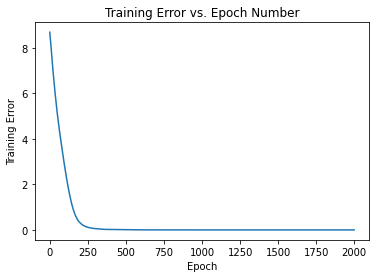

In [10]:
# Plot the training error vs. epoch number
plt.figure(1)
plt.plot(range(2000), errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')